In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.utils import shuffle 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import keras
from keras.utils import to_categorical
import os
from keras.layers import *
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras.models import Sequential, Model
from keras import optimizers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
def parse_arff(filename):
	try:
		file = open(filename)
	except:
		print('file could not found or opened, try with file location')
	columns = []
	data = []

	for line in file:
		if line.startswith('@attribute'):
			line = line.strip()
			temp = line.split()
			columns.append(temp[1])
		elif line.startswith('@') or line.startswith('\n'):
			continue
		else:
			line = line.strip()
			temp = line.split(',')
			data.append(temp)

	return data,columns

In [3]:
data, columns = parse_arff('./Training Dataset.arff')
df = pd.DataFrame(data, columns = columns, dtype=np.int8)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.3)

In [5]:
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [6]:
loss_fn = keras.losses.Huber(delta=1.0)
activation = ['softplus', 'softsign', 'selu', 'elu', 'exponential', 'tanh', 'sigmoid', 'relu']
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl']
binary_loss = ['binary_crossentropy', 'hinge', 'squared_hinge', loss_fn]

In [7]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (30,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='softplus'))

In [8]:
softplus_train = []
softplus_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test))
        softplus_train.append(modelhistory.history['accuracy'])
        softplus_val.append(modelhistory.history['val_accuracy'])

Epoch 1/50
242/242 [==============================] - 1s 4ms/step - loss: 0.5476 - accuracy: 0.8062 - val_loss: 0.3211 - val_accuracy: 0.8791
Epoch 2/50
242/242 [==============================] - 1s 3ms/step - loss: 0.3417 - accuracy: 0.8783 - val_loss: 0.3101 - val_accuracy: 0.9050
Epoch 3/50
242/242 [==============================] - 1s 3ms/step - loss: 0.2568 - accuracy: 0.9146 - val_loss: 0.2693 - val_accuracy: 0.9156
Epoch 4/50
242/242 [==============================] - 1s 3ms/step - loss: 0.2485 - accuracy: 0.9085 - val_loss: 0.3788 - val_accuracy: 0.8022
Epoch 5/50
242/242 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.8927 - val_loss: 0.2592 - val_accuracy: 0.9243
Epoch 6/50
242/242 [==============================] - 1s 2ms/step - loss: 0.2214 - accuracy: 0.9241 - val_loss: 0.2720 - val_accuracy: 0.9014
Epoch 7/50
242/242 [==============================] - 1s 2ms/step - loss: 0.1898 - accuracy: 0.9323 - val_loss: 0.2160 - val_accuracy: 0.9276
Epoch 

In [12]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (30,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='softsign'))

In [13]:
softsign_train = []
softsign_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test))
        softsign_train.append(modelhistory.history['accuracy'])
        softsign_val.append(modelhistory.history['val_accuracy'])

Epoch 1/50
242/242 [==============================] - 1s 3ms/step - loss: 0.5740 - accuracy: 0.7574 - val_loss: 0.6171 - val_accuracy: 0.6174
Epoch 2/50
242/242 [==============================] - 1s 2ms/step - loss: 0.5000 - accuracy: 0.8302 - val_loss: 1.4089 - val_accuracy: 0.5544
Epoch 3/50
242/242 [==============================] - 1s 3ms/step - loss: 0.7848 - accuracy: 0.6907 - val_loss: 0.4086 - val_accuracy: 0.8891
Epoch 4/50
242/242 [==============================] - 1s 5ms/step - loss: 0.4137 - accuracy: 0.8537 - val_loss: 0.4275 - val_accuracy: 0.9093
Epoch 5/50
242/242 [==============================] - 1s 3ms/step - loss: 0.3635 - accuracy: 0.8964 - val_loss: 0.5200 - val_accuracy: 0.9162
Epoch 6/50
242/242 [==============================] - 1s 3ms/step - loss: 0.4381 - accuracy: 0.8177 - val_loss: 0.3107 - val_accuracy: 0.9023
Epoch 7/50
242/242 [==============================] - 1s 2ms/step - loss: 0.3092 - accuracy: 0.8687 - val_loss: 0.2854 - val_accuracy: 0.9111
Epoch 

In [14]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (30,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='selu'))

In [15]:
selu_train = []
selu_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test))
        selu_train.append(modelhistory.history['accuracy'])
        selu_val.append(modelhistory.history['val_accuracy'])

Epoch 1/50
242/242 [==============================] - 1s 4ms/step - loss: 5.7878 - accuracy: 0.5712 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 2/50
242/242 [==============================] - 1s 4ms/step - loss: 8.6075 - accuracy: 0.4420 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 3/50
242/242 [==============================] - 1s 3ms/step - loss: 8.6075 - accuracy: 0.4420 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 4/50
242/242 [==============================] - 1s 3ms/step - loss: 8.6075 - accuracy: 0.4420 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 5/50
242/242 [==============================] - 1s 3ms/step - loss: 8.6075 - accuracy: 0.4420 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 6/50
242/242 [==============================] - 1s 2ms/step - loss: 8.6075 - accuracy: 0.4420 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 7/50
242/242 [==============================] - 1s 3ms/step - loss: 8.6075 - accuracy: 0.4420 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 

In [16]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (30,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='elu'))

In [17]:
elu_train = []
elu_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test))
        elu_train.append(modelhistory.history['accuracy'])
        elu_val.append(modelhistory.history['val_accuracy'])

Epoch 1/50
242/242 [==============================] - 1s 4ms/step - loss: 4.1837 - accuracy: 0.6644 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 2/50
242/242 [==============================] - 1s 3ms/step - loss: 8.6075 - accuracy: 0.4420 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 3/50
242/242 [==============================] - 0s 2ms/step - loss: 8.6075 - accuracy: 0.4420 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 4/50
242/242 [==============================] - 0s 2ms/step - loss: 8.6075 - accuracy: 0.4420 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 5/50
242/242 [==============================] - 1s 3ms/step - loss: 8.6075 - accuracy: 0.4420 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 6/50
242/242 [==============================] - 1s 4ms/step - loss: 8.6075 - accuracy: 0.4420 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 7/50
242/242 [==============================] - 1s 3ms/step - loss: 8.6075 - accuracy: 0.4420 - val_loss: 8.5518 - val_accuracy: 0.4456
Epoch 

In [20]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (30,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='exponential'))

In [21]:
exp_train = []
exp_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test))
        exp_train.append(modelhistory.history['accuracy'])
        exp_val.append(modelhistory.history['val_accuracy'])

Epoch 1/50
242/242 [==============================] - 2s 8ms/step - loss: 0.3950 - accuracy: 0.8444 - val_loss: 0.3910 - val_accuracy: 0.9150
Epoch 2/50
242/242 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8723 - val_loss: 0.2978 - val_accuracy: 0.8900
Epoch 3/50
242/242 [==============================] - 1s 3ms/step - loss: 0.4732 - accuracy: 0.8498 - val_loss: 0.2535 - val_accuracy: 0.9120
Epoch 4/50
242/242 [==============================] - 1s 2ms/step - loss: 0.4254 - accuracy: 0.8505 - val_loss: 0.2677 - val_accuracy: 0.8897
Epoch 5/50
242/242 [==============================] - 1s 3ms/step - loss: 0.5023 - accuracy: 0.8286 - val_loss: 0.3016 - val_accuracy: 0.9117
Epoch 6/50
242/242 [==============================] - 1s 3ms/step - loss: 0.2483 - accuracy: 0.9175 - val_loss: 0.2303 - val_accuracy: 0.9216
Epoch 7/50
242/242 [==============================] - 1s 2ms/step - loss: 0.2245 - accuracy: 0.9236 - val_loss: 0.2352 - val_accuracy: 0.9255
Epoch 

In [25]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (30,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='tanh'))

In [26]:
tanh_train = []
tanh_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x_train, y_train, epochs = 30, validation_data=(x_test, y_test))
        tanh_train.append(modelhistory.history['accuracy'])
        tanh_val.append(modelhistory.history['val_accuracy'])

Epoch 1/30
242/242 [==============================] - 1s 2ms/step - loss: 0.4353 - accuracy: 0.8546 - val_loss: 0.3380 - val_accuracy: 0.9129
Epoch 2/30
242/242 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.9185 - val_loss: 0.2201 - val_accuracy: 0.9153
Epoch 3/30
242/242 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9210 - val_loss: 0.1951 - val_accuracy: 0.9258
Epoch 4/30
242/242 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.9318 - val_loss: 0.1833 - val_accuracy: 0.9225
Epoch 5/30
242/242 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.8858 - val_loss: 0.7570 - val_accuracy: 0.6292
Epoch 6/30
242/242 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8945 - val_loss: 0.2018 - val_accuracy: 0.9129
Epoch 7/30
242/242 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9266 - val_loss: 0.1859 - val_accuracy: 0.9195
Epoch 

In [84]:
softplus = np.array(softplus_train)
softplusv = np.array(softplus_val)
softsign = np.array(softsign_train)
softsignv = np.array(softsign_val)
selu = np.array(selu_train)
seluv = np.array(selu_val)
elu = np.array(elu_train)
eluv = np.array(elu_val)
exp = np.array(exp_train)
expv = np.array(exp_val)
tanh = np.array(tanh_train)
tanhv = np.array(tanh_val)

In [68]:
softplus_comb = []

for opt in optimizers:
    for loss in binary:
        softplus_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(softplus.shape[0]):
  best_accuracy_train.append(np.max(softplus[i]))
  last_accuracy_train.append(softplus[i,-1])
  best_accuracy_val.append(np.max(softplusv[i]))
  last_accuracy_val.append(softplusv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

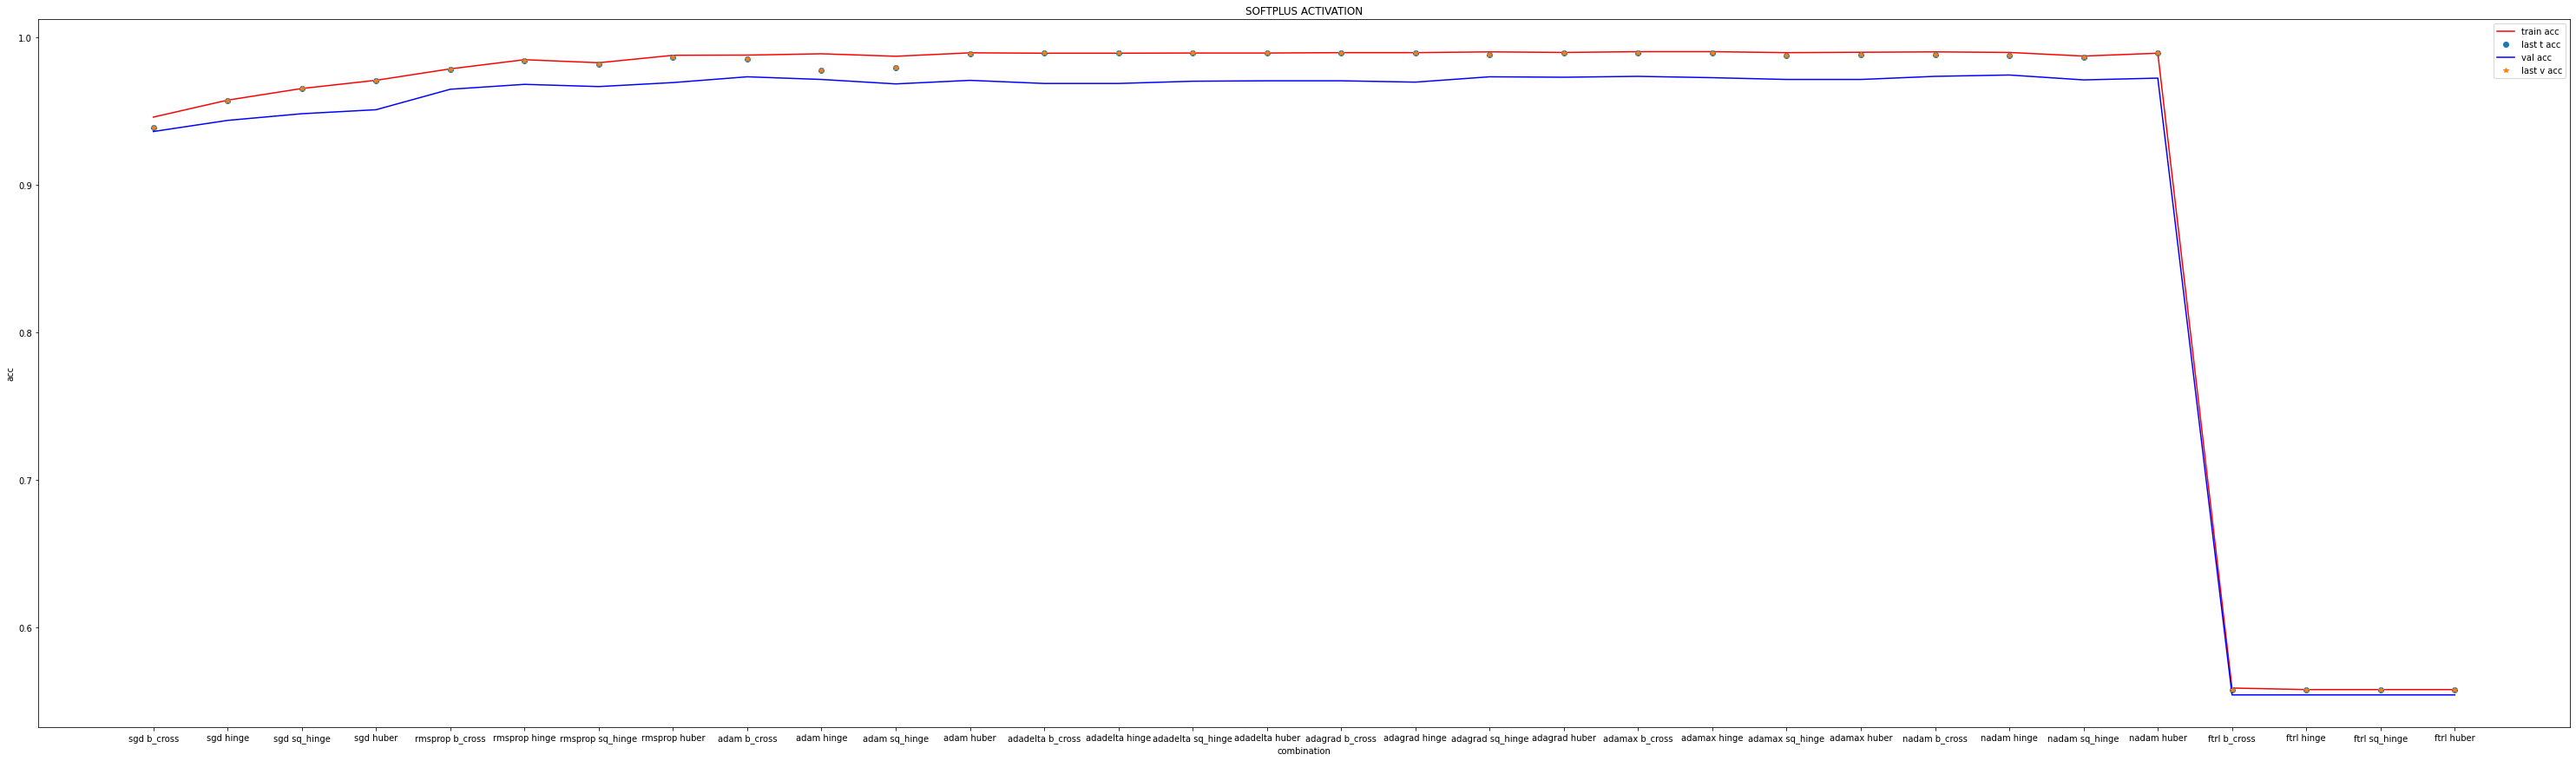

In [72]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(softplus_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(softplus_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(softplus_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(softplus_comb, last_accuracy_train, '*', label='last v acc')
plt.title('SOFTPLUS ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [75]:
softsign_comb = []

for opt in optimizers:
    for loss in binary:
        softsign_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(softsign.shape[0]):
  best_accuracy_train.append(np.max(softsign[i]))
  last_accuracy_train.append(softsign[i,-1])
  best_accuracy_val.append(np.max(softsignv[i]))
  last_accuracy_val.append(softsignv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

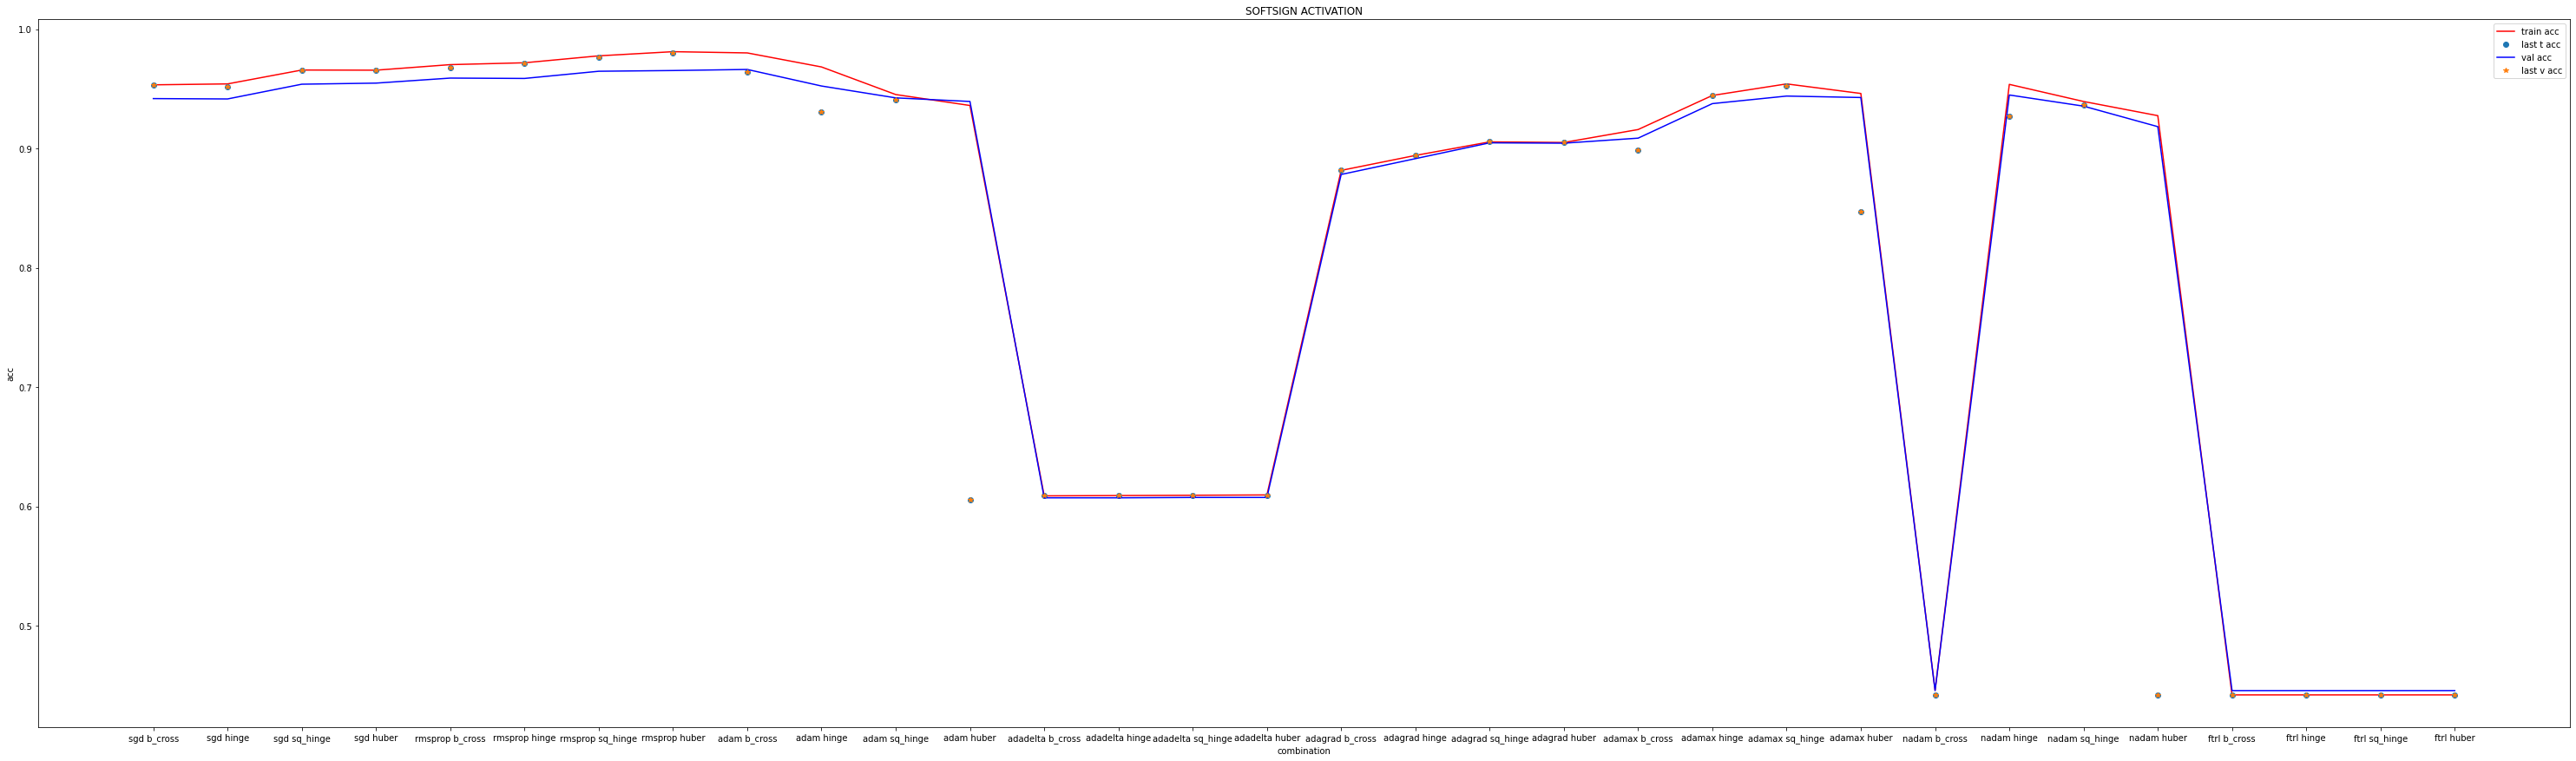

In [76]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(softplus_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(softplus_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(softplus_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(softplus_comb, last_accuracy_train, '*', label='last v acc')
plt.title('SOFTSIGN ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [78]:
selu_comb = []

for opt in optimizers:
    for loss in binary:
        selu_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(selu.shape[0]):
  best_accuracy_train.append(np.max(selu[i]))
  last_accuracy_train.append(selu[i,-1])
  best_accuracy_val.append(np.max(seluv[i]))
  last_accuracy_val.append(seluv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

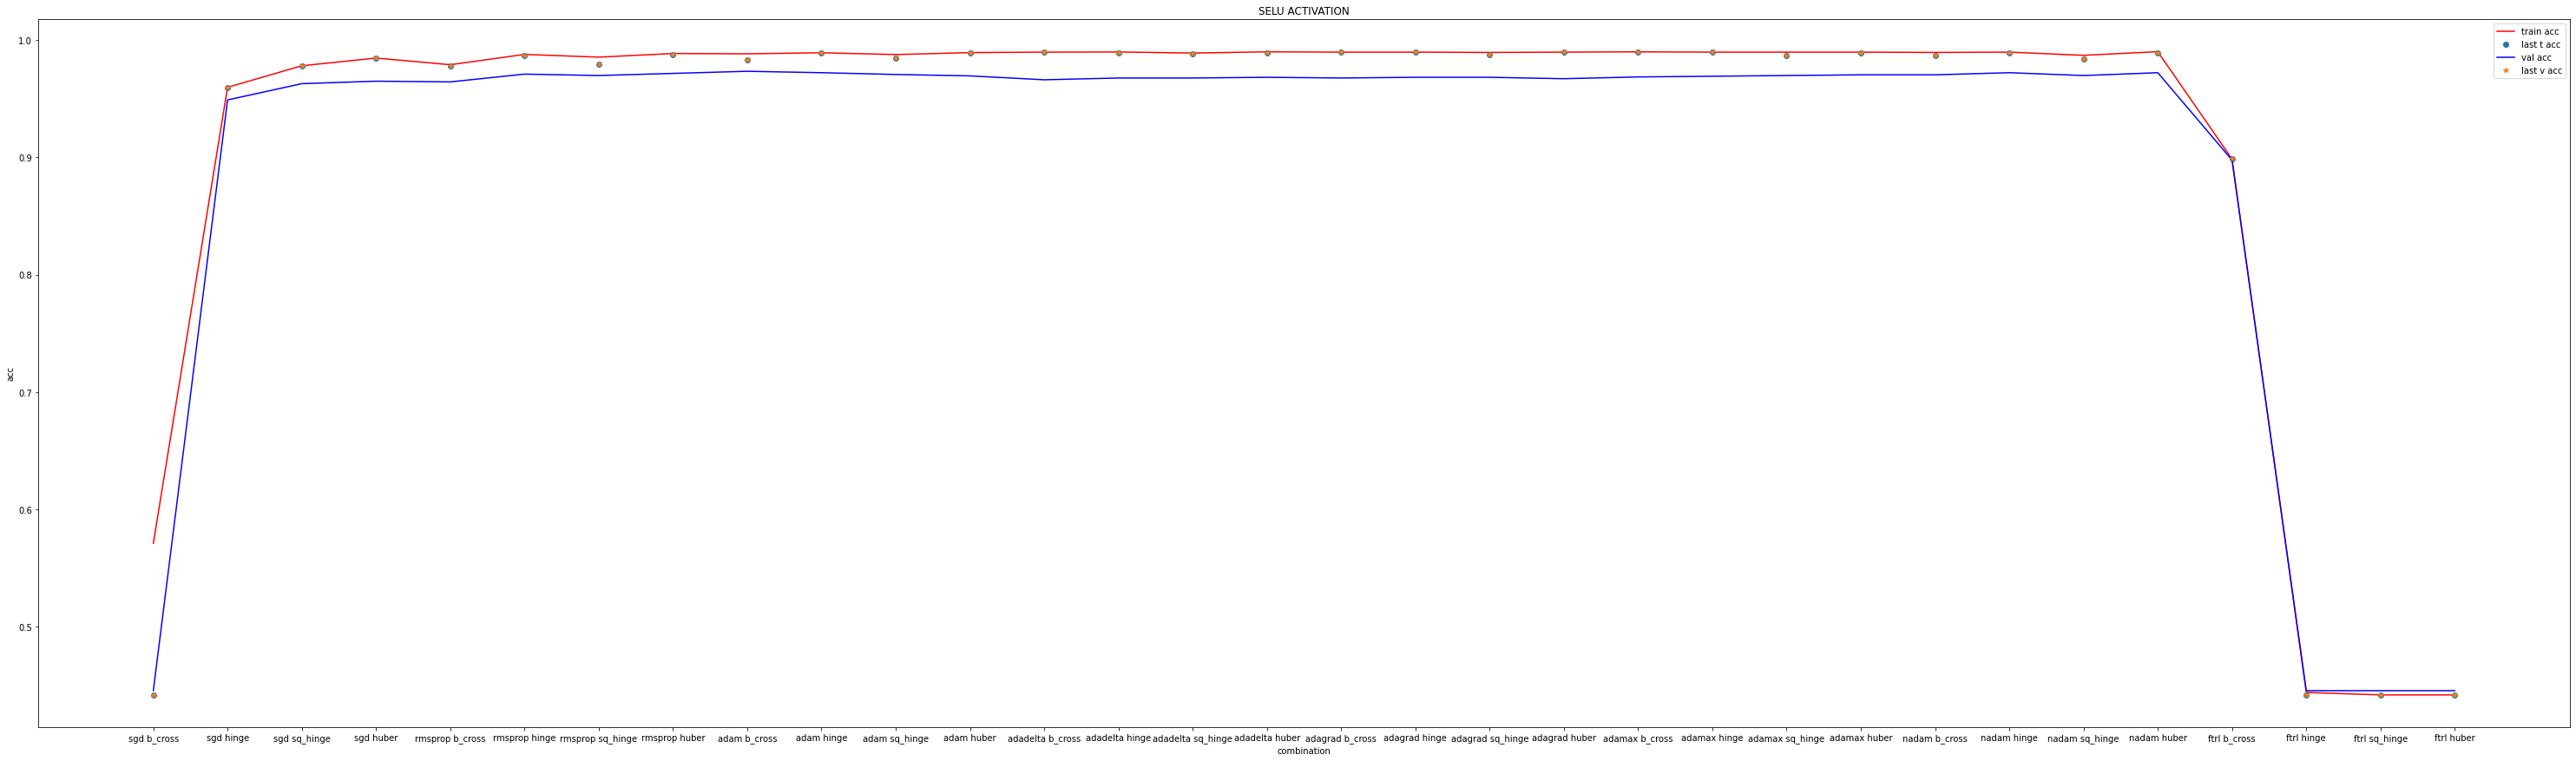

In [81]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(selu_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(selu_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(selu_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(selu_comb, last_accuracy_train, '*', label='last v acc')
plt.title('SELU ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [82]:
elu_comb = []

for opt in optimizers:
    for loss in binary:
        elu_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(elu.shape[0]):
  best_accuracy_train.append(np.max(elu[i]))
  last_accuracy_train.append(elu[i,-1])
  best_accuracy_val.append(np.max(eluv[i]))
  last_accuracy_val.append(eluv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

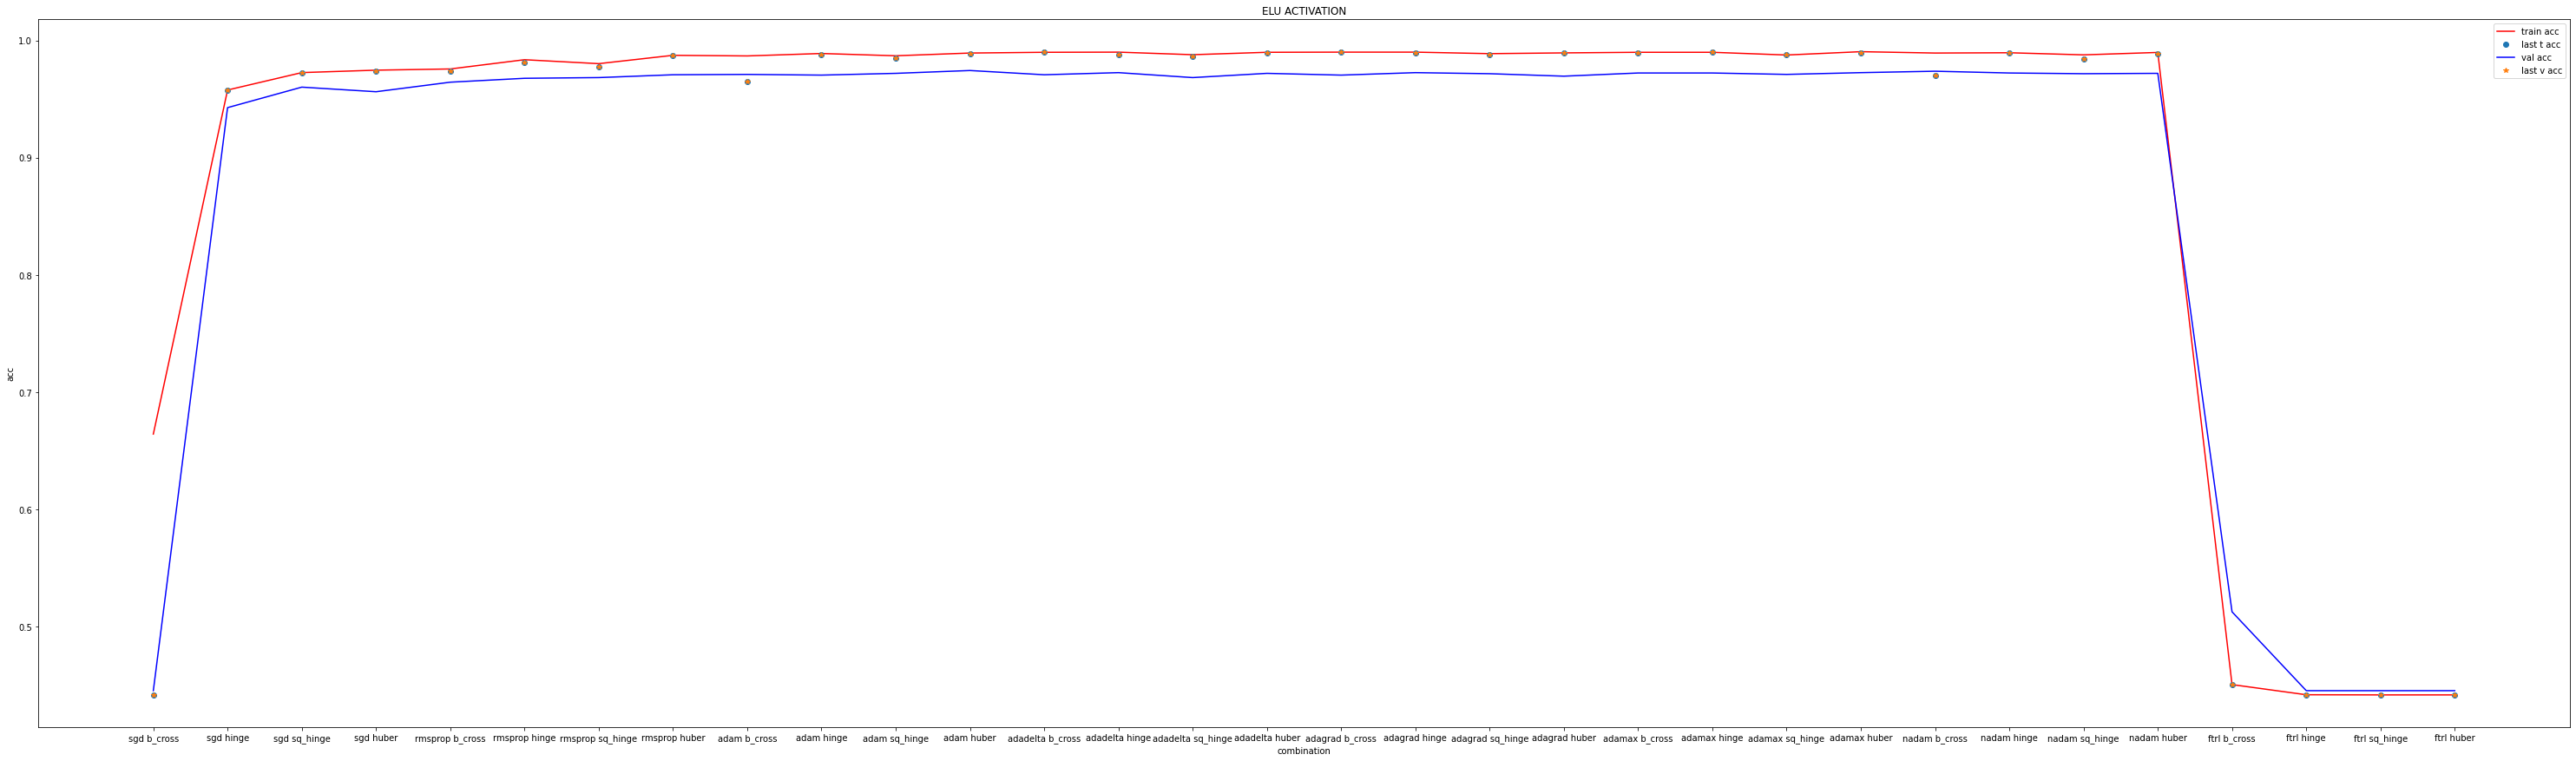

In [83]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(elu_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(elu_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(elu_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(elu_comb, last_accuracy_train, '*', label='last v acc')
plt.title('ELU ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [85]:
exp_comb = []

for opt in optimizers:
    for loss in binary:
        exp_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(exp.shape[0]):
  best_accuracy_train.append(np.max(exp[i]))
  last_accuracy_train.append(exp[i,-1])
  best_accuracy_val.append(np.max(expv[i]))
  last_accuracy_val.append(expv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

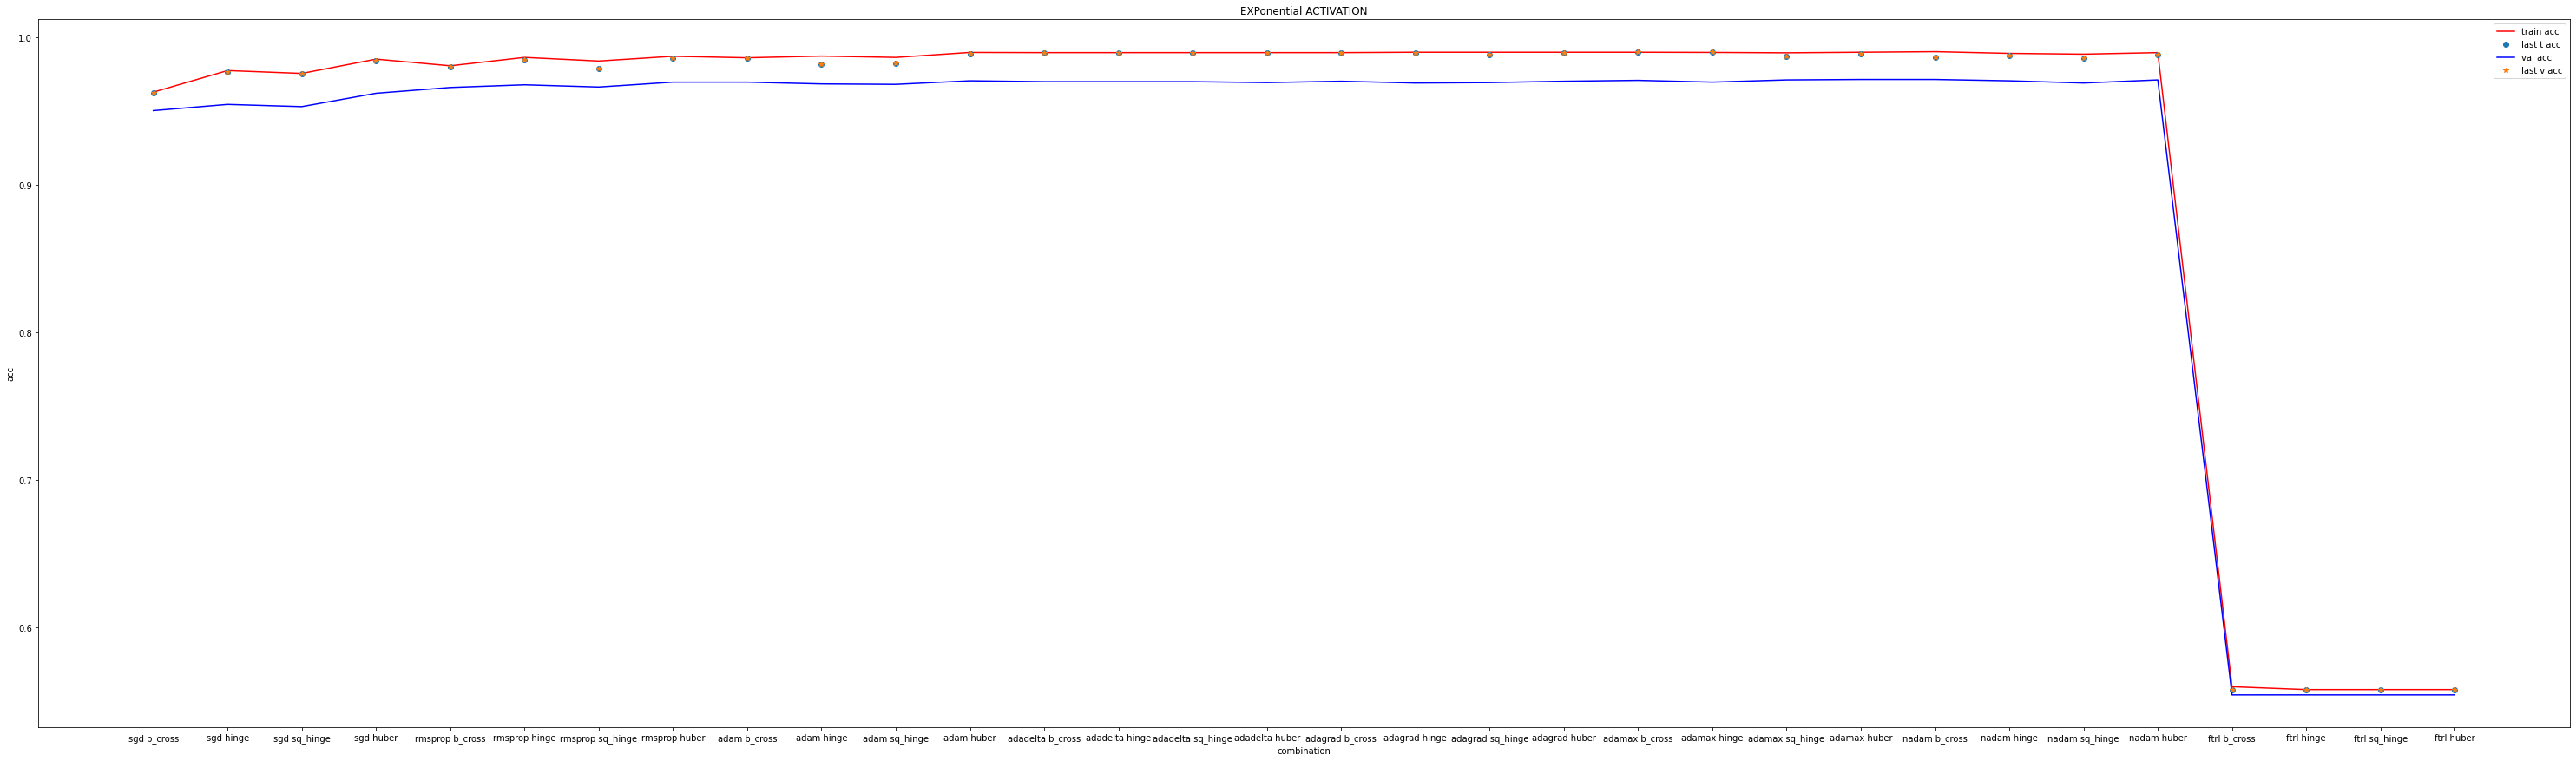

In [86]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(exp_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(exp_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(exp_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(exp_comb, last_accuracy_train, '*', label='last v acc')
plt.title('EXPonential ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [87]:
tanh_comb = []

for opt in optimizers:
    for loss in binary:
        tanh_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(tanh.shape[0]):
  best_accuracy_train.append(np.max(tanh[i]))
  last_accuracy_train.append(tanh[i,-1])
  best_accuracy_val.append(np.max(tanhv[i]))
  last_accuracy_val.append(tanhv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

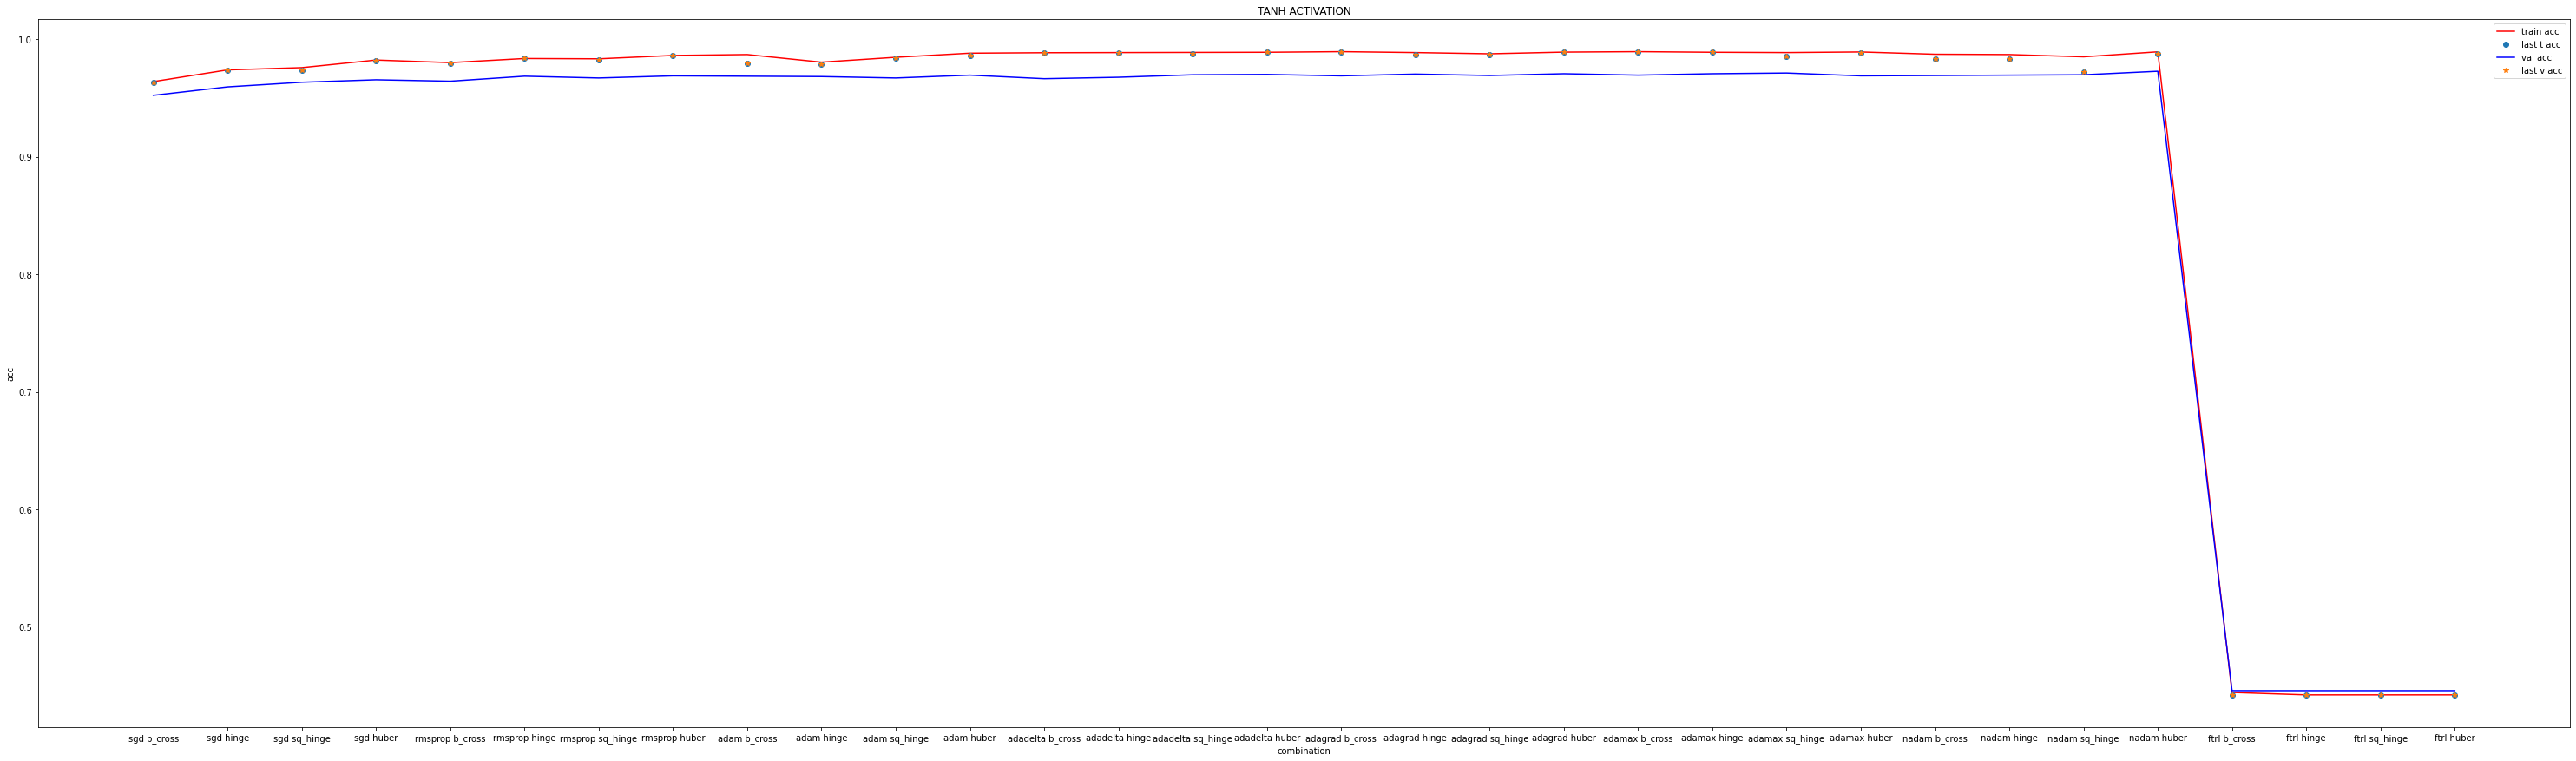

In [88]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(tanh_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(tanh_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(tanh_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(tanh_comb, last_accuracy_train, '*', label='last v acc')
plt.title('TANH ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [89]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (30,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [90]:
sigmoid_train = []
sigmoid_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x_train, y_train, epochs = 30, validation_data=(x_test, y_test))
        sigmoid_train.append(modelhistory.history['accuracy'])
        sigmoid_val.append(modelhistory.history['val_accuracy'])

Epoch 1/30
242/242 [==============================] - 1s 5ms/step - loss: 0.5252 - accuracy: 0.8133 - val_loss: 0.3432 - val_accuracy: 0.8851
Epoch 2/30
242/242 [==============================] - 1s 3ms/step - loss: 0.2682 - accuracy: 0.9045 - val_loss: 0.2450 - val_accuracy: 0.9053
Epoch 3/30
242/242 [==============================] - 1s 2ms/step - loss: 0.2175 - accuracy: 0.9173 - val_loss: 0.2177 - val_accuracy: 0.9141
Epoch 4/30
242/242 [==============================] - 1s 3ms/step - loss: 0.1972 - accuracy: 0.9249 - val_loss: 0.2020 - val_accuracy: 0.9213
Epoch 5/30
242/242 [==============================] - 1s 3ms/step - loss: 0.1855 - accuracy: 0.9288 - val_loss: 0.1935 - val_accuracy: 0.9270
Epoch 6/30
242/242 [==============================] - 1s 3ms/step - loss: 0.1780 - accuracy: 0.9303 - val_loss: 0.1908 - val_accuracy: 0.9255
Epoch 7/30
242/242 [==============================] - 1s 3ms/step - loss: 0.1713 - accuracy: 0.9341 - val_loss: 0.1837 - val_accuracy: 0.9316
Epoch 

In [91]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (30,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='relu'))

In [92]:
relu_train = []
relu_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x_train, y_train, epochs = 30, validation_data=(x_test, y_test))
        relu_train.append(modelhistory.history['accuracy'])
        relu_val.append(modelhistory.history['val_accuracy'])

Epoch 1/30
242/242 [==============================] - 2s 8ms/step - loss: 0.8145 - accuracy: 0.8361 - val_loss: 0.4063 - val_accuracy: 0.8984
Epoch 2/30
242/242 [==============================] - 1s 3ms/step - loss: 0.2696 - accuracy: 0.9172 - val_loss: 0.2964 - val_accuracy: 0.9141
Epoch 3/30
242/242 [==============================] - 1s 3ms/step - loss: 0.2350 - accuracy: 0.9221 - val_loss: 0.2303 - val_accuracy: 0.9198
Epoch 4/30
242/242 [==============================] - 1s 2ms/step - loss: 0.6699 - accuracy: 0.8997 - val_loss: 6.5690 - val_accuracy: 0.5544
Epoch 5/30
242/242 [==============================] - 1s 3ms/step - loss: 0.6027 - accuracy: 0.8885 - val_loss: 0.2577 - val_accuracy: 0.9090
Epoch 6/30
242/242 [==============================] - 1s 2ms/step - loss: 0.2089 - accuracy: 0.9219 - val_loss: 0.2310 - val_accuracy: 0.9237
Epoch 7/30
242/242 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9292 - val_loss: 0.2739 - val_accuracy: 0.9246
Epoch 

In [93]:
sigmoid = np.array(sigmoid_train)
sigmoidv = np.array(sigmoid_val)
relu = np.array(relu_train)
reluv = np.array(relu_val)

In [94]:
sigmoid_comb = []

for opt in optimizers:
    for loss in binary:
        sigmoid_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(sigmoid.shape[0]):
  best_accuracy_train.append(np.max(sigmoid[i]))
  last_accuracy_train.append(sigmoid[i,-1])
  best_accuracy_val.append(np.max(sigmoidv[i]))
  last_accuracy_val.append(sigmoidv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

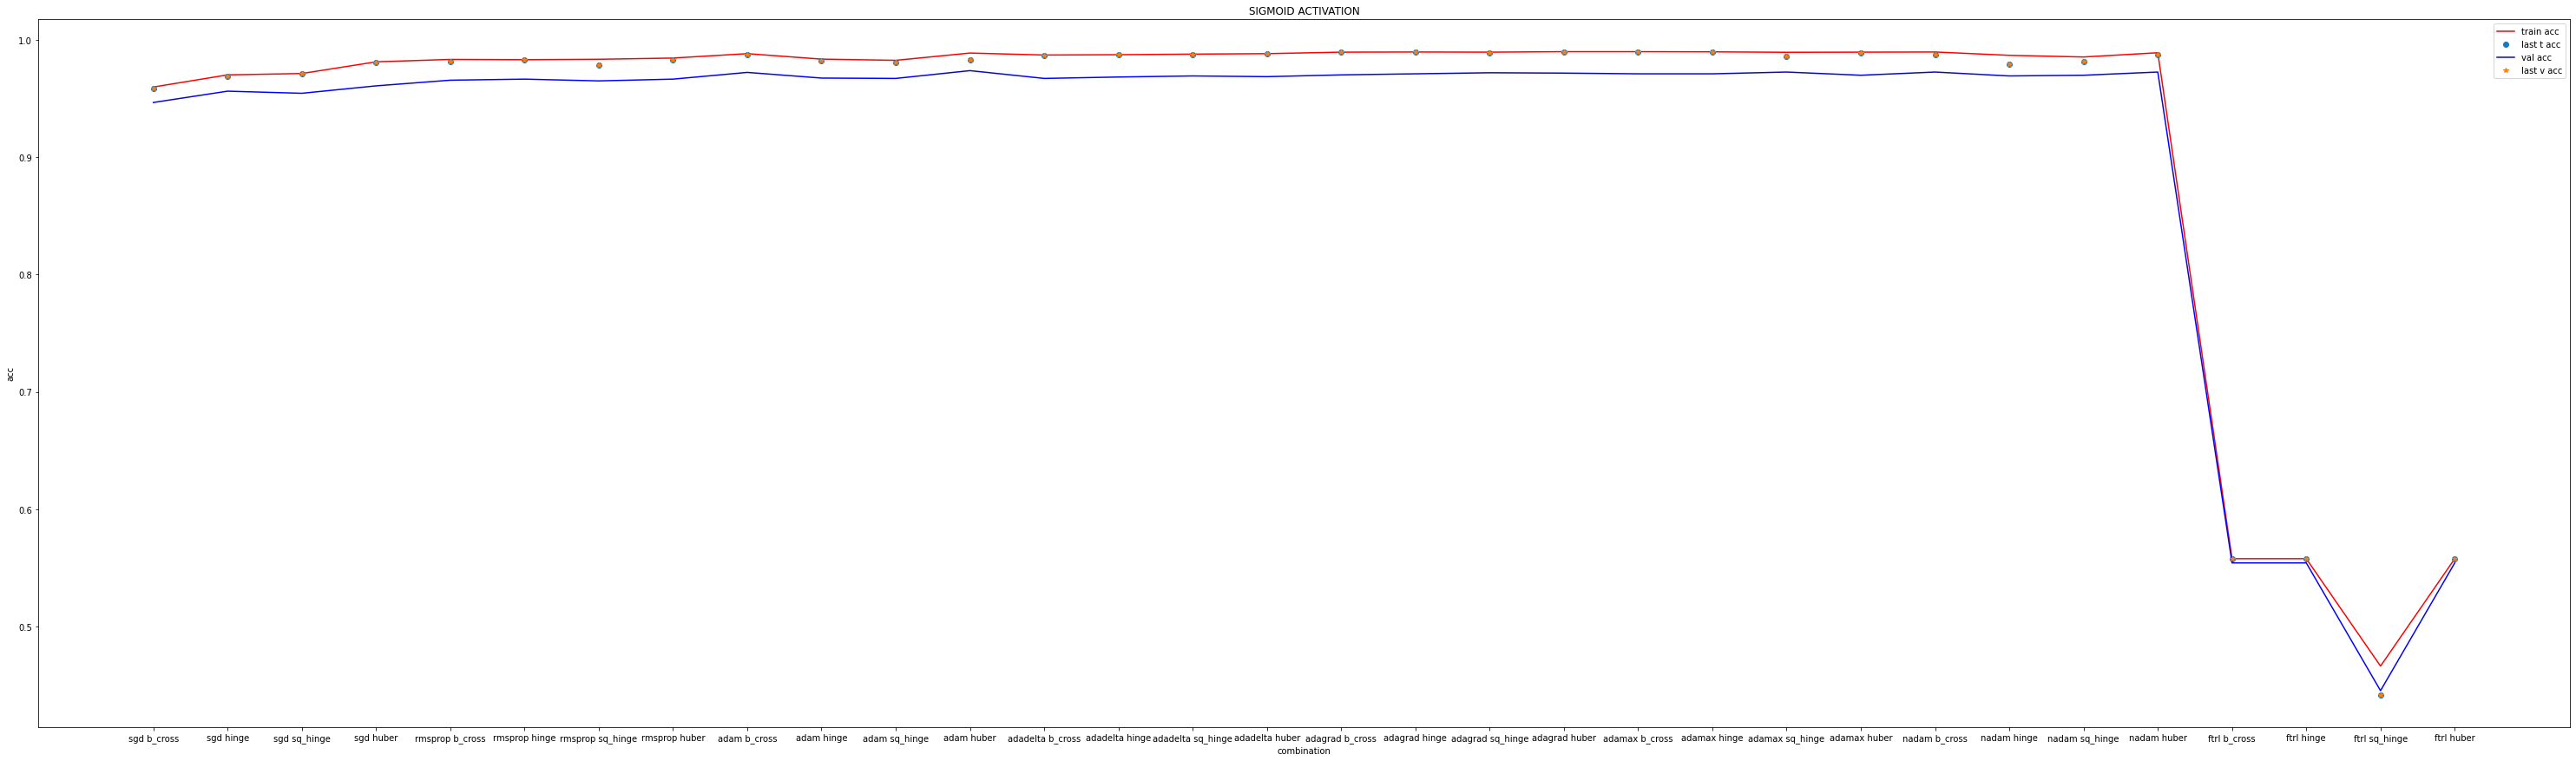

In [95]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(sigmoid_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(sigmoid_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(sigmoid_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(sigmoid_comb, last_accuracy_train, '*', label='last v acc')
plt.title('SIGMOID ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [96]:
relu_comb = []

for opt in optimizers:
    for loss in binary:
        relu_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(relu.shape[0]):
  best_accuracy_train.append(np.max(relu[i]))
  last_accuracy_train.append(relu[i,-1])
  best_accuracy_val.append(np.max(reluv[i]))
  last_accuracy_val.append(reluv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

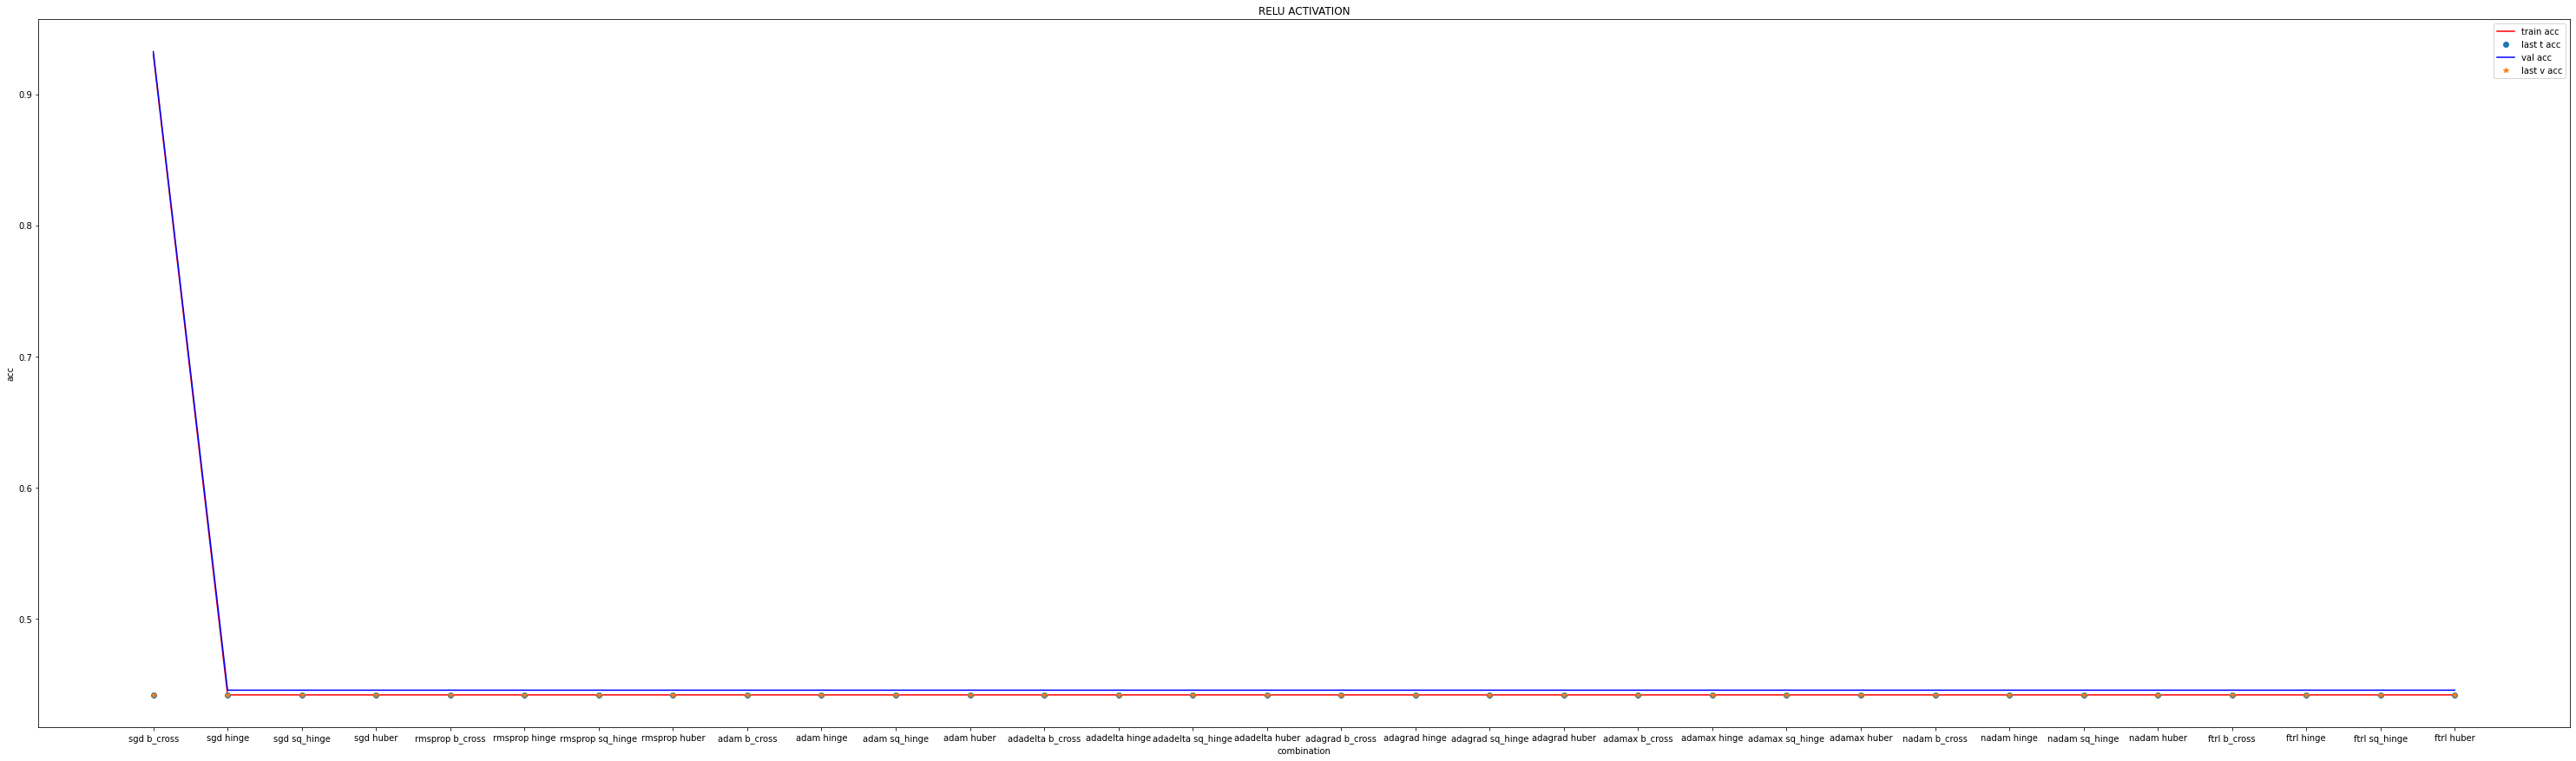

In [97]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(relu_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(relu_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(relu_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(relu_comb, last_accuracy_train, '*', label='last v acc')
plt.title('RELU ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [43]:
tanh[-1],tanh.shape[0], softplus.shape

(array([0.44197467, 0.44197467, 0.44197467, 0.44197467, 0.44197467,
        0.44197467, 0.44197467, 0.44197467, 0.44197467, 0.44197467,
        0.44197467, 0.44197467, 0.44197467, 0.44197467, 0.44197467,
        0.44197467, 0.44197467, 0.44197467, 0.44197467, 0.44197467,
        0.44197467, 0.44197467, 0.44197467, 0.44197467, 0.44197467,
        0.44197467, 0.44197467, 0.44197467, 0.44197467, 0.44197467]),
 32,
 (32, 50))

In [67]:
activation, 

(['softplus',
  'softsign',
  'selu',
  'elu',
  'exponential',
  'tanh',
  'sigmoid',
  'relu'],)

In [4]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [5]:
len(df)

11055

In [13]:
len(df[df.Result=='-1']), len(df[df.Result=='1'])

(4898, 6157)